In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:\\Users\\zahee\\Desktop\\Data Science\\Project ExcelR\\telecommunications_churn.csv")
data

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [4]:
data[data.duplicated()]

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn


C:\Users\zahee\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


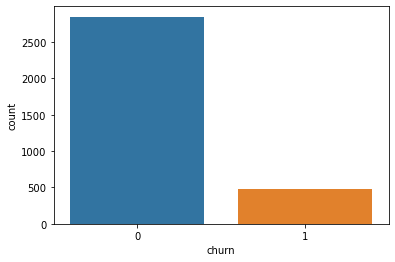

<AxesSubplot:ylabel='churn'>

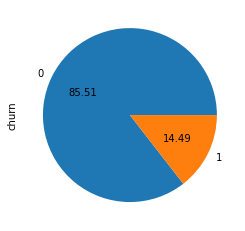

In [5]:
# Count of churned vs retained customers
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data['churn'])
plt.show()
data['churn'].value_counts().plot(kind="pie",autopct="%.2f")

### Thus, we see that there is class imbalance which needs to be taken care of with 14.5 % churn.

In [6]:
col=list(data.columns)
col

['account_length',
 'voice_mail_plan',
 'voice_mail_messages',
 'day_mins',
 'evening_mins',
 'night_mins',
 'international_mins',
 'customer_service_calls',
 'international_plan',
 'day_calls',
 'day_charge',
 'evening_calls',
 'evening_charge',
 'night_calls',
 'night_charge',
 'international_calls',
 'international_charge',
 'total_charge',
 'churn']

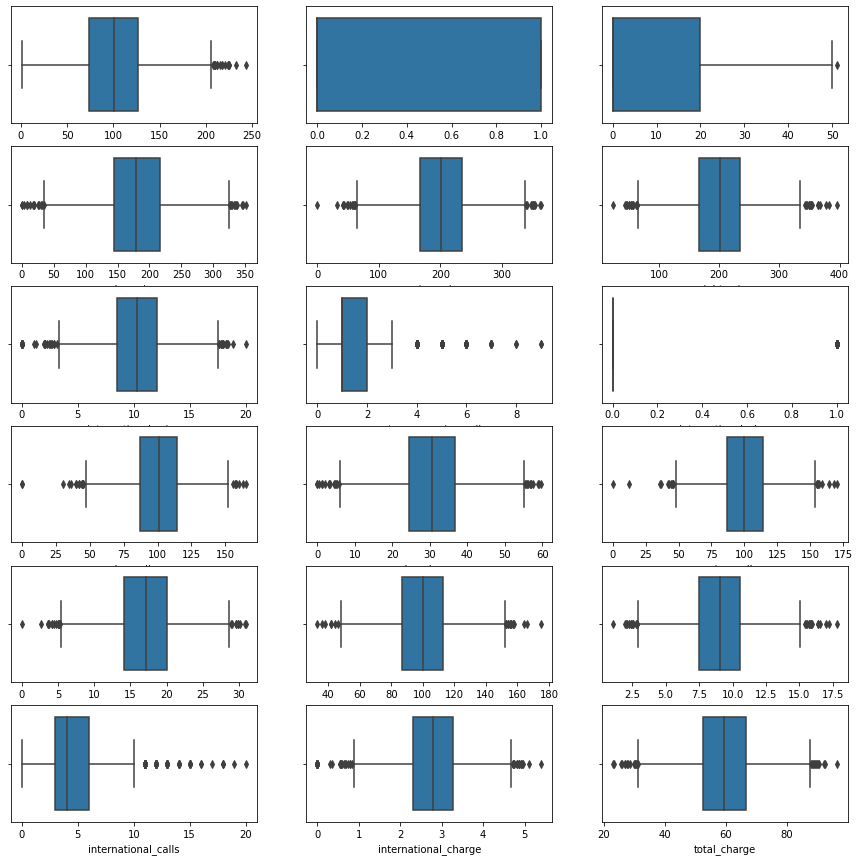

In [7]:
# Checking for outliers
import warnings
warnings.filterwarnings("ignore")

y=0
z=0
fig,ax= plt.subplots(6,3, figsize=(15,15))

for i in col:
    sns.boxplot(data[i], ax=ax[y,z])
    z=z+1
    if z>2:
        y=y+1
        z=0
        if y==6:
            break

### We can see that the the ouliers do exist but do not look like error values. Hence, retaining the outliers for model training.

<AxesSubplot:xlabel='day_charge', ylabel='total_charge'>

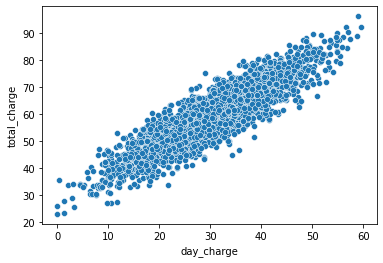

In [8]:
# Scatterplot between 'day charge' and 'total charge'
sns.scatterplot(data['day_charge'],data['total_charge'])

#### We can see that day charge is positively correlated to total charge

<AxesSubplot:xlabel='churn', ylabel='total_charge'>

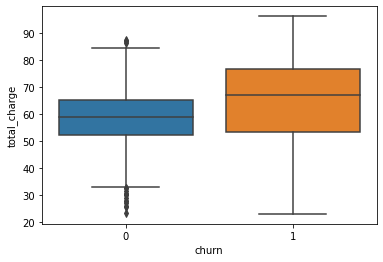

In [9]:
# Box plot plotting total charge vs churn 
sns.boxplot(data['churn'], data['total_charge'])

### We can see that customers who left the Telecom provider contributed more towards the revenue

<AxesSubplot:xlabel='churn', ylabel='customer_service_calls'>

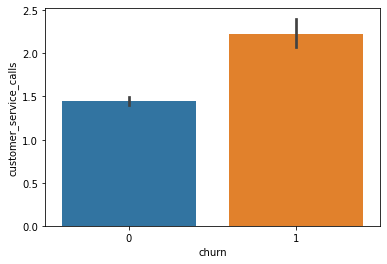

In [10]:
# Plot between 'customer service calls' and 'churn'
sns.barplot(data['churn'],data['customer_service_calls'])

### Thus, the churned customers on an average made more customer service calls than those who did not churn.

In [11]:
# Customers who churned with respect to the voice mail plan
voice_churn = pd.crosstab(data['voice_mail_plan'], data['churn'])
voice_churn

churn,0,1
voice_mail_plan,,
0,2008,403
1,842,80


<AxesSubplot:xlabel='churn', ylabel='voice_mail_plan'>

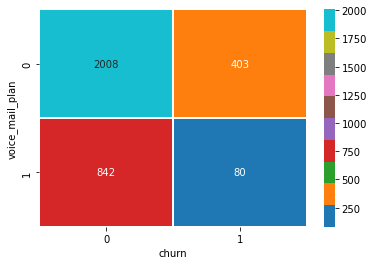

In [12]:
sns.heatmap(voice_churn,annot=True,fmt='d',linecolor='w',linewidth=2,cmap='tab10')

### We can see that 403 customers churned who had adopted '0' voice mail plan

<AxesSubplot:xlabel='total_charge', ylabel='Density'>

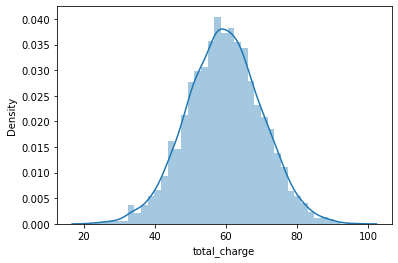

In [13]:
sns.distplot(data['total_charge'])

#### Probability of total charge being 60 is the highest

In [14]:
data.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


#### 1) 75% of the customers made 2 customer service calls.However, the maximum customer service calls made were 9.
#### 2) 25% of the customers remained with Telecom provider for the account length of 74, less than the average of 101.
#### 3) 50% of the customers did not make use of voice mail messages.
#### 4) 25% of the customers talked less than the average during day, evening and night time.
#### 5) 25% of the customers spent less time than the mean on international calls.

# Classwise churn analysis

In [15]:
# Analysis for churned customers
cust_churn = data[data['churn']==1].describe()
cust_churn

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.00000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.0
mean,102.664596,0.165631,5.115942,206.914079,212.410145,205.231677,10.70000,2.229814,0.283644,101.335404,35.175921,100.561077,18.054969,100.399586,9.235528,4.163561,2.889545,65.355963,1.0
std,39.467820,0.372135,11.860138,68.997792,51.728910,47.132825,2.79319,1.853275,0.451233,21.582307,11.729710,19.724711,4.396762,19.950659,2.121081,2.551575,0.754152,13.885268,0.0
min,1.000000,0.000000,0.000000,0.000000,70.900000,47.400000,2.00000,0.000000,0.000000,0.000000,0.000000,48.000000,6.030000,49.000000,2.130000,1.000000,0.540000,22.930000,1.0
25%,76.000000,0.000000,0.000000,153.250000,177.100000,171.250000,8.80000,1.000000,0.000000,87.500000,26.055000,87.000000,15.055000,85.000000,7.705000,2.000000,2.380000,53.425000,1.0
50%,103.000000,0.000000,0.000000,217.600000,211.300000,204.800000,10.60000,2.000000,0.000000,103.000000,36.990000,101.000000,17.960000,100.000000,9.220000,4.000000,2.860000,66.910000,1.0
75%,127.000000,0.000000,0.000000,265.950000,249.450000,239.850000,12.80000,4.000000,1.000000,116.500000,45.210000,114.000000,21.205000,115.000000,10.795000,5.000000,3.460000,76.655000,1.0
max,225.000000,1.000000,48.000000,350.800000,363.700000,354.900000,20.00000,9.000000,1.000000,165.000000,59.640000,168.000000,30.910000,158.000000,15.970000,20.000000,5.400000,96.150000,1.0


#### 1) 25% of the customers who churned were with the Telecom provider for account length of 76 against mean of 101(as stated in above step).
#### 2) 75% of the churned customers did not make use of voice mail messages at all.
#### 3) Churned customers talktime in minutes is higher than the average customer during day ,evening and night time, resulting in considerable revenue loss.
#### 4) Also, for the international calls,churned customers talktime in minutes is higher than the average customer.
#### 5) Revenue  generated by the churned customers on an average is higher than that of overall customers.
#### 6) 75% of the churned customers made 4 customer service calls with the maximum calls made were 9.

In [16]:
# Analysis for retained customers
cust_retain = data[data['churn']==0].describe()
cust_retain

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.000000,2850.0
mean,100.793684,0.295439,8.604561,175.175754,199.043298,200.133193,10.158877,1.449825,0.065263,100.283158,29.780421,100.038596,16.918909,100.058246,9.006074,4.532982,2.743404,58.448807,0.0
std,39.882350,0.456320,13.913125,50.181655,50.292175,51.105032,2.784489,1.163883,0.247033,19.801157,8.530835,19.958414,4.274863,19.506246,2.299768,2.441984,0.751784,9.458436,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,23.250000,0.0
25%,73.000000,0.000000,0.000000,142.825000,164.500000,165.900000,8.400000,1.000000,0.000000,87.000000,24.282500,87.000000,13.980000,87.000000,7.470000,3.000000,2.270000,52.220000,0.0
50%,100.000000,0.000000,0.000000,177.200000,199.600000,200.250000,10.200000,1.000000,0.000000,100.000000,30.120000,100.000000,16.970000,100.000000,9.010000,4.000000,2.750000,58.920000,0.0
75%,127.000000,1.000000,22.000000,210.300000,233.200000,234.900000,12.000000,2.000000,0.000000,114.000000,35.750000,114.000000,19.820000,113.000000,10.570000,6.000000,3.240000,65.137500,0.0
max,243.000000,1.000000,51.000000,315.600000,361.800000,395.000000,18.900000,8.000000,1.000000,163.000000,53.650000,170.000000,30.750000,175.000000,17.770000,19.000000,5.100000,87.290000,0.0


#### 1) On an average, the revenue generated by the retained customers is less than that generated by churned customers.
#### 2) Retained customers spend less time talking on phone during day,evening & night time when compared to churned customers.
#### 3) Retained customers also spend less time talking internationally against customers who left the Telecom provider.

# Feature Extraction through Random Forest, ANOVA and Correlation

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
df=data.copy()

In [19]:
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [20]:
X= df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [21]:
model=RandomForestClassifier()
model.fit(X,Y)

RandomForestClassifier()

In [22]:
# get importance
importance = model.feature_importances_
importance

array([0.02460425, 0.03592821, 0.04924094, 0.08705196, 0.03683073,
       0.02188101, 0.03784634, 0.12946788, 0.08075076, 0.0223437 ,
       0.08086481, 0.01900107, 0.03656921, 0.02028013, 0.0239064 ,
       0.0463222 , 0.02856467, 0.21854572])

In [23]:
# summarize feature importance
z=list(df.columns)
for i,v in enumerate(importance):
    print('Feature: {}, Score: {}' .format(z[i],round(v,5)))

Feature: account_length, Score: 0.0246
Feature: voice_mail_plan, Score: 0.03593
Feature: voice_mail_messages, Score: 0.04924
Feature: day_mins, Score: 0.08705
Feature: evening_mins, Score: 0.03683
Feature: night_mins, Score: 0.02188
Feature: international_mins, Score: 0.03785
Feature: customer_service_calls, Score: 0.12947
Feature: international_plan, Score: 0.08075
Feature: day_calls, Score: 0.02234
Feature: day_charge, Score: 0.08086
Feature: evening_calls, Score: 0.019
Feature: evening_charge, Score: 0.03657
Feature: night_calls, Score: 0.02028
Feature: night_charge, Score: 0.02391
Feature: international_calls, Score: 0.04632
Feature: international_charge, Score: 0.02856
Feature: total_charge, Score: 0.21855


In [24]:
# test= list(enumerate(X))
# table = pd.DataFrame(test,columns=['Sno.','Features'])

In [25]:
test= X.columns
table = pd.DataFrame(test,columns=['Features'])
table['Importance']=importance
table.sort_values('Importance', ascending=False)

,Features,Importance
17,total_charge,0.218546
7,customer_service_calls,0.129468
3,day_mins,0.087052
10,day_charge,0.080865
8,international_plan,0.080751
2,voice_mail_messages,0.049241
15,international_calls,0.046322
6,international_mins,0.037846
4,evening_mins,0.036831
12,evening_charge,0.036569


<AxesSubplot:xlabel='Importance', ylabel='Features'>

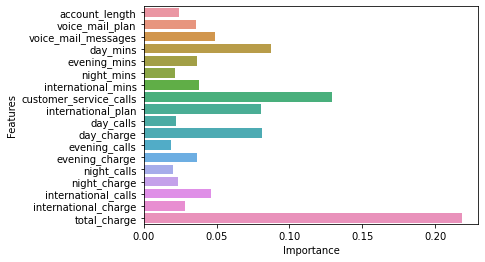

In [26]:
sns.barplot(table['Importance'],table['Features'])

### Thus, total charge,customer service calls,international plan,day charge,day mins are the top 5 predictors

# ANOVA

In [27]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
fs = SelectKBest(score_func = f_classif, k = 18)
model = fs.fit(X,Y)

In [28]:
p_values= np.round(model.pvalues_,3)
print('P values:', p_values)

P values: [0.34  0.    0.    0.    0.    0.04  0.    0.    0.    0.287 0.    0.594
 0.    0.723 0.04  0.002 0.    0.   ]


In [29]:
F1_score= np.round(model.scores_,3)
print('F1 score', F1_score)

F1 score [9.12000e-01 3.51230e+01 2.70360e+01 1.46351e+02 2.89330e+01 4.20100e+00
 1.55830e+01 1.51767e+02 2.41206e+02 1.13500e+00 1.46351e+02 2.84000e-01
 2.89260e+01 1.26000e-01 4.20200e+00 9.32800e+00 1.55930e+01 1.88708e+02]


In [30]:
test1=X.columns
table2 = pd.DataFrame(test1,columns=['features'])
table2['p value']= p_values
table2['f1 score']= F1_score
table2.sort_values('f1 score', ascending=False)

,features,p value,f1 score
8,international_plan,0.000,241.206
17,total_charge,0.000,188.708
7,customer_service_calls,0.000,151.767
3,day_mins,0.000,146.351
10,day_charge,0.000,146.351
1,voice_mail_plan,0.000,35.123
4,evening_mins,0.000,28.933
12,evening_charge,0.000,28.926
2,voice_mail_messages,0.000,27.036
16,international_charge,0.000,15.593


## Thus, we can see from Random Forest and ANOVA - day calls,evening calls,night calls and account length are least important

# Correlation

<AxesSubplot:>

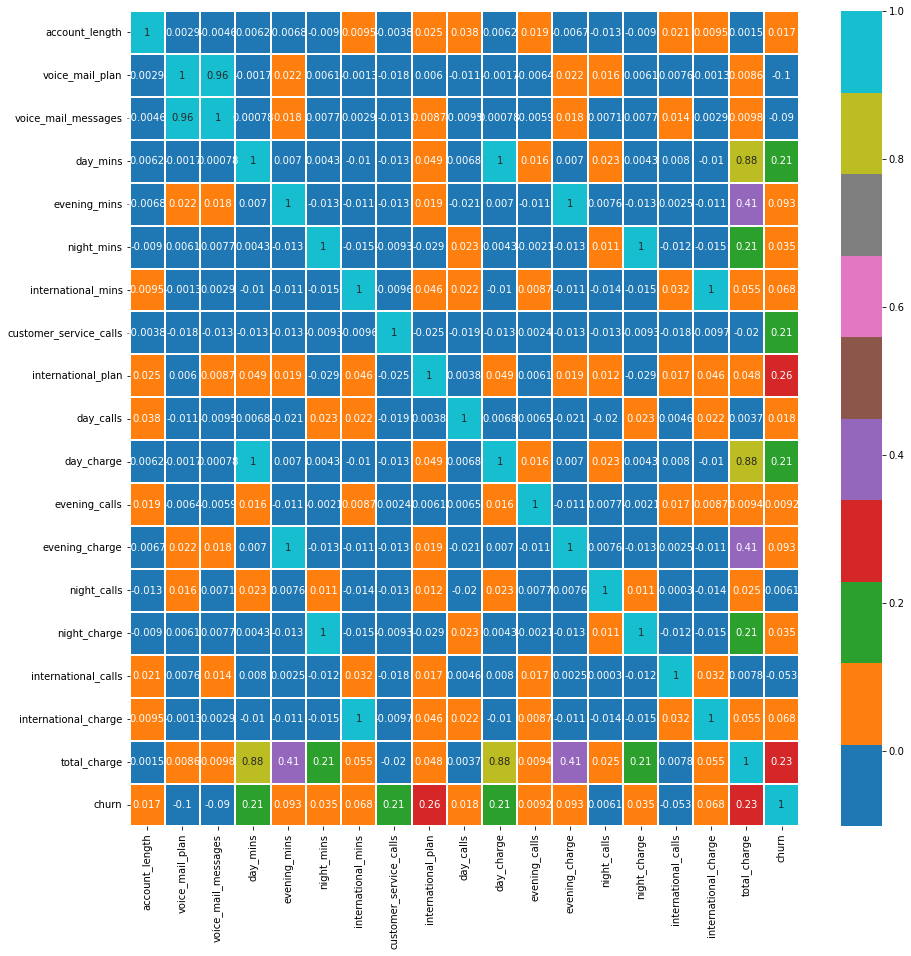

In [31]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True, linecolor='w',linewidth=2,cmap='tab10')

### Dropping predictors with correlation 1 as they provide duplicate information. Hence, dropping voice mail plan,evening charge,day charge, night charge, international charge.